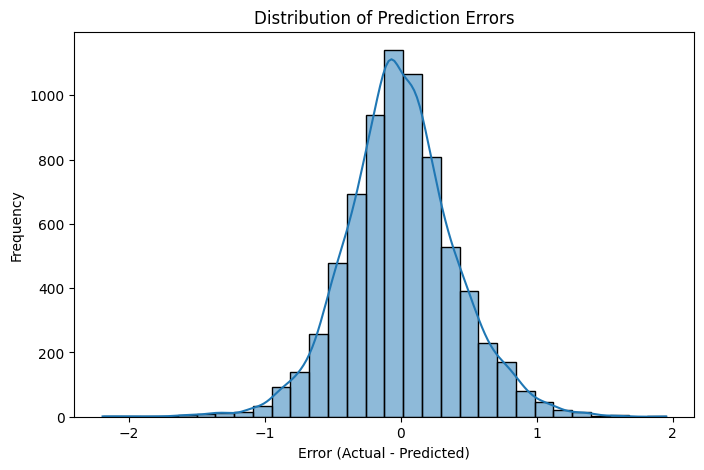

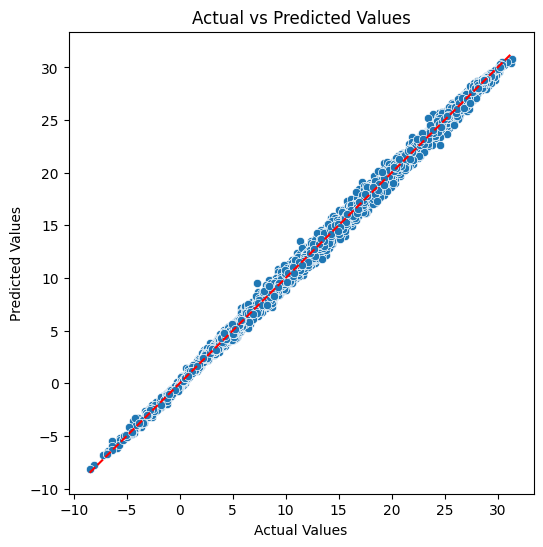

In [ ]:
import logging
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error


log_file = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\logs\error_analysis.log"
logging.basicConfig(
    filename=log_file,
    filemode='a',
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)
logging.info("=== Error Analysis Started ===")


data_path = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\data\Feature_Selection\yeosu_weather_selected.csv"
df = pd.read_csv(data_path)
logging.info(f"Data loaded: {df.shape}")


model_path = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\models\best_model\best_model.pkl"
model = joblib.load(model_path)
logging.info("Trained model loaded successfully.")


target_col = 'Average Temperature (°C)'  
X = df.drop(columns=[target_col])
y = df[target_col]


y_pred = model.predict(X)


r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
errors = y - y_pred
abs_errors = np.abs(errors)

logging.info(f"R2: {r2:.4f}, MAE: {mae:.4f}")


error_df = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred,
    'Error': errors,
    'Absolute Error': abs_errors
}).reset_index(drop=True)


top_errors = error_df.nlargest(10, 'Absolute Error')
logging.info(f"Top 10 worst predictions:\n{top_errors}")


error_df.to_csv(r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\logs\error_analysis_results.csv", index=False)
logging.info("Error analysis CSV saved successfully.")

# ===== Plots =====
plt.figure(figsize=(8,5))
sns.histplot(errors, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

logging.info("=== Error Analysis Finished ===")


In [ ]:

if 'date' in df.columns:
    id_values = df['date']
else:
    id_values = df.index  


error_cols = pd.DataFrame({
    'ID': id_values,
    'Error': errors,
    'Absolute Error': abs_errors
})

print("First 10 errors:")
print(error_cols.head(10))


worst_predictions = error_cols.sort_values(by='Absolute Error', ascending=False).head(10)

print("🔎 Top 10 Worst Predictions:")
display(worst_predictions)


First 10 errors:
   ID     Error  Absolute Error
0   0  0.199502        0.199502
1   1  0.325130        0.325130
2   2  0.036846        0.036846
3   3  0.029868        0.029868
4   4 -0.050110        0.050110
5   5  0.036020        0.036020
6   6  0.131139        0.131139
7   7 -0.252409        0.252409
8   8 -0.346121        0.346121
9   9  0.285881        0.285881
🔎 Top 10 Worst Predictions:


,ID,Error,Absolute Error
2885,2885,-2.193901,2.193901
681,681,-2.086208,2.086208
4166,4166,1.953601,1.953601
143,143,-1.931223,1.931223
3890,3890,-1.783529,1.783529
3514,3514,-1.663686,1.663686
2868,2868,1.650017,1.650017
2840,2840,-1.611476,1.611476
2314,2314,-1.599955,1.599955
4484,4484,1.589712,1.589712


In [4]:
top_error_ids = worst_predictions['ID'].values
top_error_features = df.loc[top_error_ids]
print(top_error_features)


      Day  Maximum Temperature (°C)  Minimum Temperature (°C)  \
2885   25                      17.1                       3.7   
681    13                      19.5                       8.1   
4166   29                      27.5                      17.4   
143    24                      24.3                      14.6   
3890   26                      30.2                      20.3   
3514   16                      29.3                      22.8   
2868    8                      16.4                       8.3   
2840   11                      25.9                      15.1   
2314    3                      23.1                      14.8   
4484   12                      17.7                       9.7   

      Atmospheric Pressure (hPa)  Relative Humidity (%)  Precipitation (mm)  \
2885                      1013.2                   50.0            3.094219   
681                       1021.6                   57.0            0.693147   
4166                      1011.3               

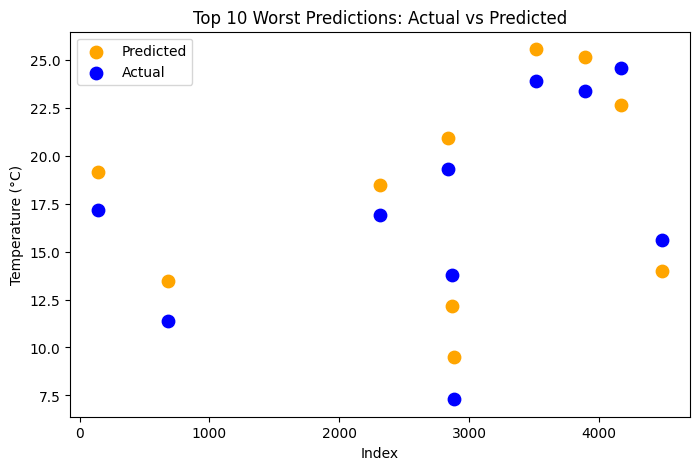

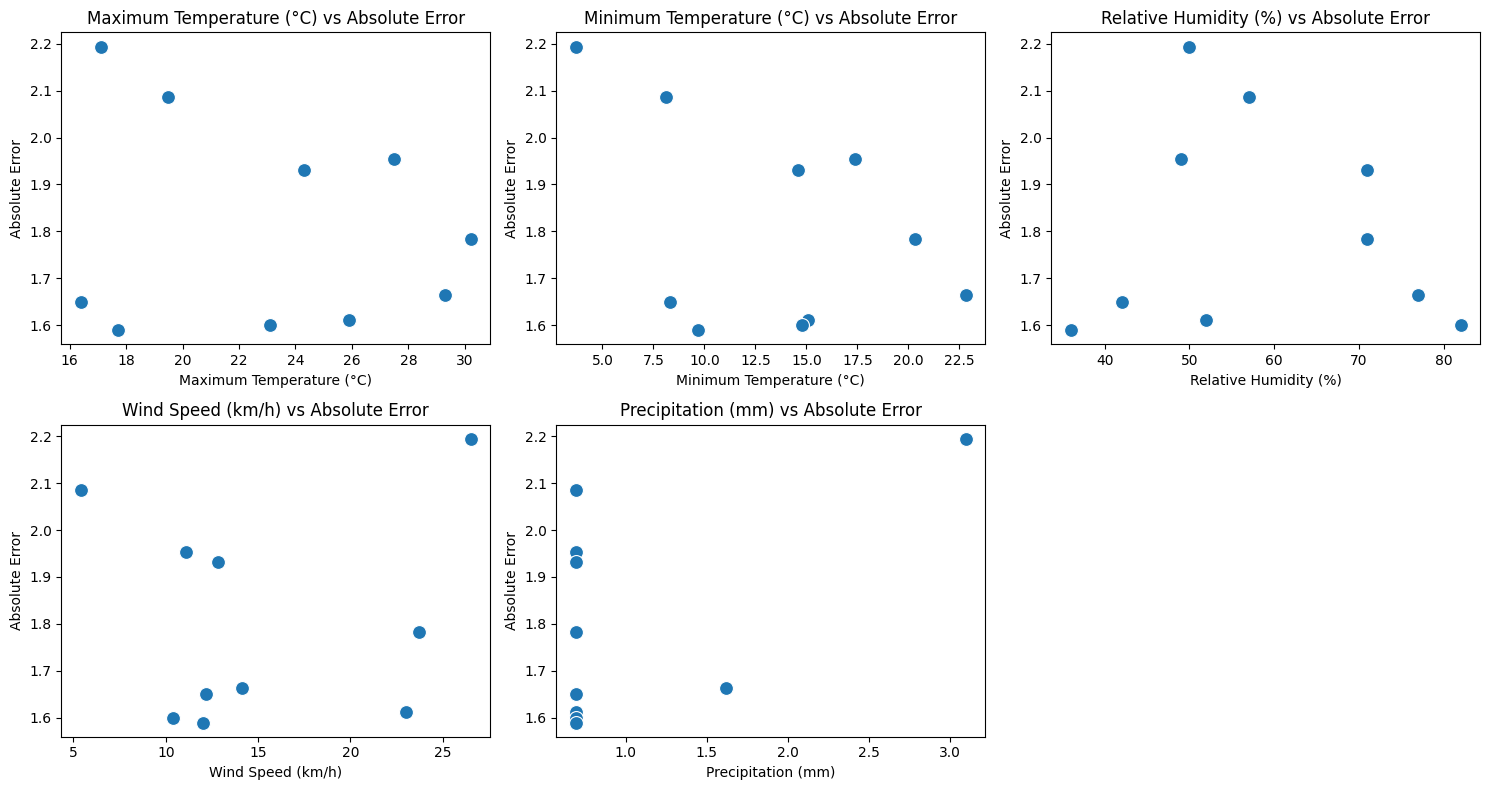

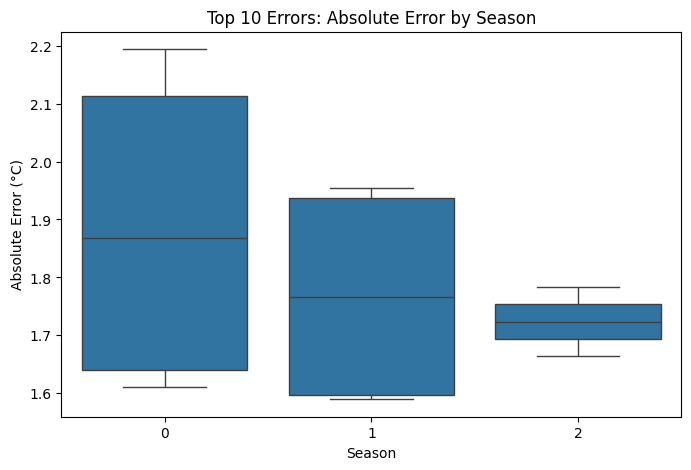

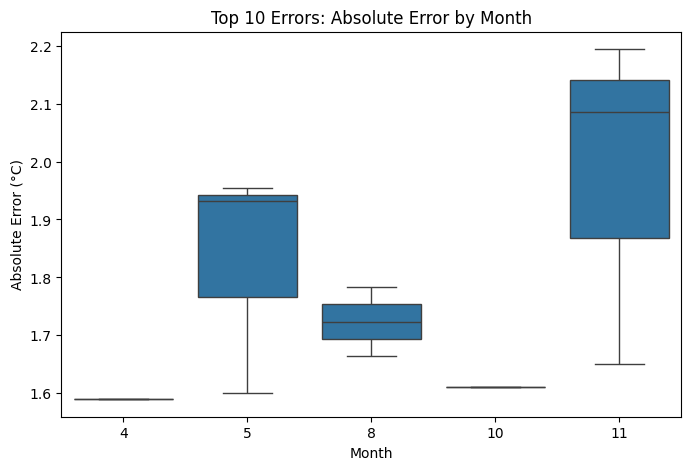

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


top_error_ids = worst_predictions['ID'].values
top_errors_df = df.loc[top_error_ids].copy()
top_errors_df['Absolute_Error'] = abs_errors[top_error_ids]


plt.figure(figsize=(8,5))
plt.scatter(top_errors_df.index, y_pred[top_error_ids], label='Predicted', color='orange', s=80)
plt.scatter(top_errors_df.index, top_errors_df['Average Temperature (°C)'], label='Actual', color='blue', s=80)
plt.title("Top 10 Worst Predictions: Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


features_to_check = ['Maximum Temperature (°C)', 'Minimum Temperature (°C)',
                     'Relative Humidity (%)', 'Wind Speed (km/h)', 'Precipitation (mm)']

plt.figure(figsize=(15,8))
for i, feat in enumerate(features_to_check):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=top_errors_df[feat], y=top_errors_df['Absolute_Error'], s=100)
    plt.xlabel(feat)
    plt.ylabel("Absolute Error")
    plt.title(f"{feat} vs Absolute Error")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x='Season_FE', y='Absolute_Error', data=top_errors_df)
plt.title("Top 10 Errors: Absolute Error by Season")
plt.xlabel("Season")
plt.ylabel("Absolute Error (°C)")
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x='Month', y='Absolute_Error', data=top_errors_df)
plt.title("Top 10 Errors: Absolute Error by Month")
plt.xlabel("Month")
plt.ylabel("Absolute Error (°C)")
plt.show()
